In [169]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-11 00:34:47,918: Credentials are already in use. The existing account in the session will be replaced.


# Chapter 7 - Introduction to Qiskit

In [171]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator


In [172]:
# Create a quantum circuit with 1 qubit, add an H gate
qc = QuantumCircuit(1)
qc.h(0)
# Set backend to unitary simulator
simulator = Aer.get_backend('unitary_simulator')
# Execute on unitary simulator
result = execute(qc, simulator).result()
# Obtain results and print it out on console
unitaryState = result.get_unitary(qc)
print(unitaryState)


[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


# Setup IBMQ Account info on local machine 

In [ ]:
from qiskit import IBMQ
IBMQ.save_account(‘PASTE-API-TOKEN-HERE’)


In [177]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.monitor import job_monitor

#You only need to load your account ONCE for each notebook. 
IBMQ.load_account()

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.h(0)
qc.measure([0],[0])
# Specify a backend from the list available to you, 
# In this example we will use ibmq_’valencia’
backend = provider.get_backend('ibmq_valencia')
job_object = execute(qc, backend)
job_monitor(job_object)


ibmqfactory.load_account:WARNING:2020-09-11 00:39:28,370: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


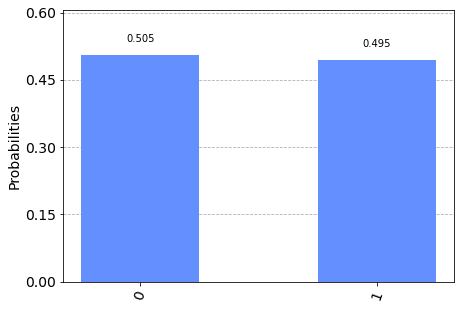

In [178]:
from qiskit.visualization import plot_histogram
result = job_object.result()
counts = result.get_counts(qc)
plot_histogram(counts)


In [179]:
import qiskit.tools.jupyter
%qiskit_version_table